torch.Size([1, 3, 256, 256])


TypeError: Invalid dimensions for image data

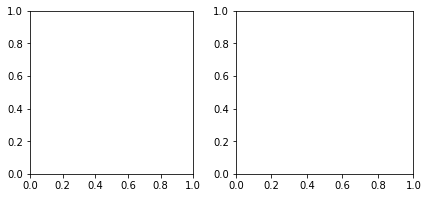

In [11]:
import os
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.externals import joblib
from models.cycle_gan_model import CycleGANModel

def myImshow(image, ax):
    ax.imshow(image)
    ax.axis('off')

def tensor2im(input_image, imtype=np.uint8):
    if not isinstance(input_image, np.ndarray):
        if isinstance(input_image, torch.Tensor):  # get the data from a variable
            image_tensor = input_image.data
        else:
            return input_image
        image_numpy = image_tensor.cpu().float().numpy()  # convert it into a numpy array
        if image_numpy.shape[0] == 1:  # grayscale to RGB
            image_numpy = np.tile(image_numpy, (3, 1, 1))
        #print(image_numpy.shape)
        image_numpy = (np.transpose(image_numpy, (1, 2, 0)) + 1) / 2.0 * 255.0  # post-processing: tranpose and scaling
    else:  # is a numpy array
        image_numpy = input_image
    return image_numpy.astype(imtype)

def load_network():
        load_filename = 'latest_ukiyoe_G_A.pkl'
        net = joblib.load(load_filename)
        # print(net)
        return net

def load_image(path):
    img = Image.open(path).convert('RGB')
    transform2 = transforms.Compose([
    transforms.ToTensor(), 
    ]
    )
    img_tensor = transform2(img)
    return img_tensor
    
if __name__ == '__main__':
    GAN = load_network()   # latest_ukiyoe_G_A.pth under the same directory
    input_image = load_image(path='test_image.jpg')   # path = test image's path
    store = Image.open('test_image.jpg').convert('RGB')
    input_image = input_image.reshape([1, input_image.shape[0], input_image.shape[1], input_image.shape[2]])
    print(input_image.shape)
    output_image = GAN(input_image)
    output_image = tensor2im(output_image[0])
    fig, axes = plt.subplots(ncols=2, figsize=(7, 3))
    myImshow(store, axes[0])
    myImshow(output_image, axes[1])
    plt.show()
        
